In [59]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
import random

# Ejercicio 1

In [13]:
def f1(punto): return (punto[0]/2,punto[1]/2)

In [14]:
def f2(punto): return (punto[0]/2+0.5,punto[1]/2)

In [15]:
def f3(punto): return (punto[0]/2+0.25,punto[1]/2+0.5)

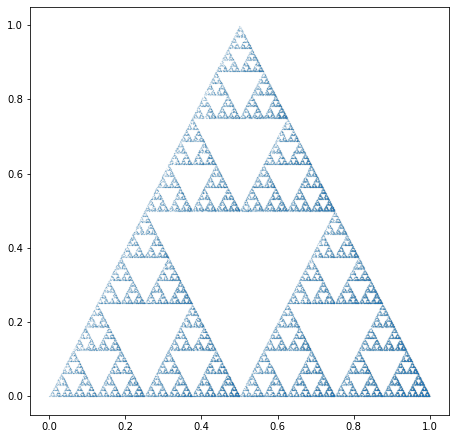

In [131]:
num_puntos = 100000
pesos = [np.random.randint(100),np.random.randint(100),np.random.randint(100)]
puntos = [(0,0)]
func = random.choices([0,1,2], weights=pesos, k=num_puntos)
for i in range(num_puntos):
    p = puntos[i]
    f = func[i]
    if f == 0:
        puntos.append(f1(p))
    elif f == 1:
        puntos.append(f2(p))
    elif f == 2:
        puntos.append(f3(p))


plt.scatter(*zip(*puntos),s=0.001)
plt.gcf().set_size_inches((7.5,7.5))
plt.show()

# Ejercicio 2

In [142]:
def F1(x, y): return x*0.85 + y*0.04 + 0.0, x*-0.04 + y*0.85 + 1.6
def F2(x, y): return -0.15*x + 0.28*y + 0.0, x*0.26 + y*0.24 + 0.44
def F3(x, y): return x*0.2 + y*-0.26 + 0.0, x*0.23 + y*0.22 + 1.6
def F4(x, y): return x*0.0 + y*0.0, x*0.0 + y*0.16

In [147]:
def Framework4(P,n):
    num_puntos = n
    pesos = P
    puntos = [(0,0)]
    func = random.choices([0,1,2,3], weights=pesos, k=num_puntos)
    for i in range(num_puntos):
        p = puntos[i]
        f = func[i]
        if f == 0:
            puntos.append(F1(p[0],p[1]))
        elif f == 1:
            puntos.append(F2(p[0],p[1]))
        elif f == 2:
            puntos.append(F3(p[0],p[1]))
        elif f == 3:
            puntos.append(F4(p[0],p[1]))


    plt.scatter(*zip(*puntos),s=0.001)
    plt.gcf().set_size_inches((7.5,7.5))
    plt.show()

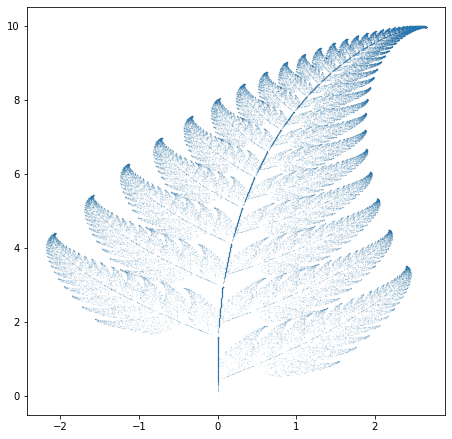

In [152]:
Framework4([0.85, 0.07, 0.07, 0.01],100000)

# Ejercicio 3